In [2]:
conda install -c conda-forge transformers

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Bob\Anaconda3

  added / updated specs:
    - transformers


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    regex-2020.11.13           |   py37hcc03f2d_1         347 KB  conda-forge
    sacremoses-0.0.43          |     pyh9f0ad1d_0         430 KB  conda-forge
    tokenizers-0.9.4           |   py37h537c2b9_1         1.8 MB  conda-forge
    transformers-4.3.2         |     pyhd8ed1ab_0         907 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.4 MB

The following NEW packages will be INSTALLED:

  regex              conda-forge/win-64::regex-2020.11.13-py37hcc03f2d_1
  sacremoses         conda-forge/noarch::sacremoses-0.0.43-pyh9f0ad1d_0
  tokenizers         conda-forge/win-64::tokenizers-0.9.4-py37h537

In [4]:
import transformers
from transformers import AutoModel, BertTokenizerFast

In [180]:
import nltk
import spacy
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

import numpy as np

from sklearn.model_selection import train_test_split
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from spacy.lang.en.stop_words import STOP_WORDS

import gensim
from gensim.models import Word2Vec

import pandas as pd
from transformers import AdamW

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [68]:
a = pd.read_csv('Kaggle Movie Sentiment/train.tsv',sep='\t')

In [69]:
a['Phrase']
a.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [70]:
# for cc,(x,y,z) in enumerate((zip(a['SentenceId'],a['Phrase'],a['Sentiment']))):
#     print("cc: {}".format(cc))
#     print("x: {}".format(x))
#     print(y)
#     print(z)

In [72]:
corpus=[]
label=[]
num=[]
for h,(x,y,z) in enumerate((zip(a['SentenceId'],a['Phrase'],a['Sentiment']))):
#     print(a)
#     print(x)
#     print(y)
#     print(z)
#     break

    num.append(x)
    if x==0:
        corpus.append(y)
        label.append(z)
    elif x!=num[h-1]:
        corpus.append(y)
        label.append(z)
        
#this is because there are a large number of abanden data so we dont want to include those

In [73]:
print(len(corpus))
print(len(label))

8528
8528


In [245]:
nltk_stopword = stopwords.words('english')
spacy_stopword = STOP_WORDS
total_stopword = set(nltk_stopword).union(spacy_stopword)

In [246]:
ExcepStopWords = {
    'again',
    'against',
    'ain',
    'almost',
    'among',
    'amongst',
    'amount',
    'anyhow',
    'anyway',
    'aren',
    "aren't",
    'below',
    'bottom',
    'but',
    'cannot',
    'couldn',
    "couldn't",
    'didn',
    "didn't",
    'doesn',
    "doesn't",
    'don',
    "don't",
    'done',
    'down',
    'except',
    'few',
    'hadn',
    "hadn't",
    'hasn',
    "hasn't",
    'haven',
    "haven't",
    'however',
    'isn',
    "isn't",
    'least',
    'mightn',
    "mightn't",
    'must',
    'mustn',
    "mustn't",
    'needn',
    "needn't",
    'neither',
    'never',
    'nevertheless',
    'no',
    'nobody',
    'none',
    'noone',
    'nor',
    'not',
    'nothing',
    'should',
    "should've",
    'shouldn',
    "shouldn't",
    'too',
    'top',
    'up',
    'wasn',
    "wasn't",
    'well',
    'weren',
    "weren't",
    'won',
    "won't",
    'wouldn',
    "wouldn't",
}

In [247]:
Mystopword = total_stopword - ExcepStopWords

In [251]:
def mytokenizer(data):
    aa = tokenizer.tokenize(data)
    return [x.lower() for x in aa]

def remove_stop(data):
    return [x for x in data if x not in Mystopword]

nlp = spacy.load('en',disable=['parser','tagger','ner'])
def my_lemma(data):
    mylist =[]
    for x in data:
        y = nlp(x)
        for z in y:
            mylist.append(z.lemma_)
    return mylist

def pipline(data):
    review = mytokenizer(data)
    review = remove_stop(review)
    review = my_lemma(review)
    return review

In [257]:
review = list(map(pipline,corpus))


In [259]:
print(corpus[1])
print(review[1])

Even fans of Ismail Merchant 's work , I suspect , would have a hard time sitting through this one .
['fan', 'ismail', 'merchant', "'", 'work', ',', 'suspect', ',', 'hard', 'time', 'sit', '.']


In [269]:
my_review=[]
for x in review:
    my_review.append(" ".join(x))
len(my_review)


8528

In [270]:
train_x,valid_x,train_y,valid_y = train_test_split(corpus,label,random_state=2018,test_size=0.2)

In [271]:
print(len(train_x))
print(len(train_y))
print(len(valid_x))
print(len(valid_y))

6822
6822
1706
1706


In [111]:
# b = pd.read_csv('Kaggle Movie Sentiment/test.tsv',sep='\t') 
#since our test data has no labels, then we dont use it for our example here

In [112]:
# test_corp=[]
# test_label=[]
# for x, y in zip(b['Phrase'])
#since our test data has no labels, then we dont use it for our example here

In [42]:
#load pretrained bert model
bert = AutoModel.from_pretrained('bert-base-uncased')

# Load bert tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

In [272]:
#sample trying
aaa=[]
aaa.append(train_x[1])
aaa.append(train_x[2])
sample_id = tokenizer.batch_encode_plus(aaa,padding=True,return_token_type_ids=False)

In [273]:
len(train_x[1].split())

4

In [274]:
train_x[4]

'The biggest problem with Satin Rouge is Lilia herself .'

In [275]:
sample_id

{'input_ids': [[101, 1037, 11937, 21756, 16137, 7911, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 2061, 2182, 2009, 2003, 1024, 2009, 1005, 1055, 2055, 1037, 2155, 1997, 14768, 26796, 1012, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

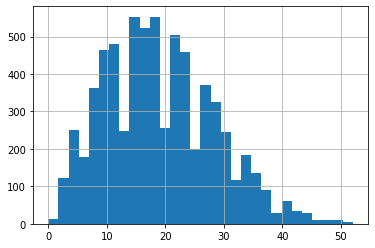

In [276]:
%matplotlib inline
seq_len = [len(x.split()) for x in train_x]
pd.Series(seq_len).hist(bins=30)

In [277]:
max_len=25
train_x
print(len(train_x))

6822


In [278]:
# this tokenizer convert a sentense into indexes and also add in attention masks


train_token = tokenizer.batch_encode_plus(
    train_x,
    max_length = max_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
         )

In [279]:
print(len(train_x))

6822


In [280]:
valid_token = tokenizer.batch_encode_plus(
    valid_x,
    max_length = max_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False)

In [281]:
# so we need to conver the tokenised sentense into tensor format

train_x = torch.tensor(train_token['input_ids'])
train_mask = torch.tensor(train_token['attention_mask'])
train_y=torch.tensor(train_y)

In [282]:
valid_x = torch.tensor(valid_token['input_ids'])
valid_mask = torch.tensor(valid_token['attention_mask'])
valid_y=torch.tensor(valid_y)

In [283]:
# create a dataloader

batch_size=64

train_dataset = TensorDataset(train_x,train_mask,train_y)
#train_sampler = RandomSampler(train_dataset)
#train_dataloader = DataLoader(train_dataset,sampler=train_sampler,batch_size=batch_size)
train_dataloader = DataLoader(train_dataset,batch_size=batch_size)

valid_dataset = TensorDataset(valid_x,valid_mask,valid_y)
#valid_sampler = SequentialSampler(valid_dataset)
#valid_dataloader = DataLoader(valid_dataset,sampler=valid_sampler,batch_size=batch_size)
valid_dataloader = DataLoader(valid_dataset,batch_size=batch_size)

In [284]:
print(len(train_x))
print(len(train_mask))
print(len(train_y))
      
print(len(valid_x))
print(len(valid_mask))
print(len(valid_y))

6822
6822
6822
1706
1706
1706


In [285]:
####################################BERT model#######################
for para in bert.parameters():
    para.requires_grad = False

In [286]:
class my_bert(nn.Module):
    def __init__(self,bert_net):
        super(my_bert,self).__init__()
        self.bert_net = bert_net
        self.dropout = nn.Dropout(0.2)
        self.relu=nn.ReLU()
        self.fc1 = nn.Linear(768,512)
        self.fc2 = nn.Linear(512,5)
        
    def forward(self,data,mask):
        
        __,myoutput = self.bert_net(data,attention_mask=mask,return_dict=False)
        output = self.fc1(myoutput)
        #output = self.relu(output)
        output = self.dropout(output)
        output = self.fc2(output)
        
        return output

In [287]:
model = my_bert(bert)
model = model.to(device)

In [297]:
losses = nn.CrossEntropyLoss()
opt = AdamW(model.parameters(),lr=0.000005)
#opti_scheduler=torch.optim.lr_scheduler.StepLR(opt,step_size=500,gamma=0.95)

In [298]:
epoch=50
for a in range(epoch):
    model.train()
    acc=0
    for x, bundled in enumerate(train_dataloader):
        
        newdata = [n.to(device) for n in bundled]
        data,mask,y = newdata
        pred = model(data,mask)
        loss = losses(pred,y)
        #opt.zero_grad()
        loss.backward()
        opt.step()
        #opti_scheduler.step()
        opt.zero_grad()
        prediction = torch.argmax(pred,dim=1) #this return the indices of the max value
        #or we can use: __,prediction = torch.max(pred,dim=1)
        accu = torch.sum(prediction==y).item()
        acc += accu
        if (x+1)%20==0:
            print('Batch # {} with loss {:.5f}'.format(x+1,loss))
            #print('lr rate: {}'.format(opti_scheduler.get_last_lr()))
    
    print('Epoch #{} with accuracy of {:.2%}'.format(a+1,acc/(len(train_x))))

Batch # 20 with loss 1.24656
Batch # 40 with loss 1.33624
Batch # 60 with loss 1.19038
Batch # 80 with loss 1.23058
Batch # 100 with loss 1.36372
Epoch #1 with accuracy of 45.76%
Batch # 20 with loss 1.38060
Batch # 40 with loss 1.35848
Batch # 60 with loss 1.14412
Batch # 80 with loss 1.26572
Batch # 100 with loss 1.32265
Epoch #2 with accuracy of 45.88%
Batch # 20 with loss 1.34862
Batch # 40 with loss 1.36963
Batch # 60 with loss 1.15781
Batch # 80 with loss 1.24918
Batch # 100 with loss 1.37547
Epoch #3 with accuracy of 45.22%
Batch # 20 with loss 1.26042
Batch # 40 with loss 1.36654
Batch # 60 with loss 1.19020
Batch # 80 with loss 1.21628
Batch # 100 with loss 1.22150
Epoch #4 with accuracy of 45.59%
Batch # 20 with loss 1.27764
Batch # 40 with loss 1.36710
Batch # 60 with loss 1.14280
Batch # 80 with loss 1.24147
Batch # 100 with loss 1.32452
Epoch #5 with accuracy of 44.83%
Batch # 20 with loss 1.26442
Batch # 40 with loss 1.31113
Batch # 60 with loss 1.10466
Batch # 80 with lo

Batch # 100 with loss 1.26059
Epoch #46 with accuracy of 44.77%
Batch # 20 with loss 1.26478
Batch # 40 with loss 1.36858
Batch # 60 with loss 1.19956
Batch # 80 with loss 1.21861
Batch # 100 with loss 1.31538
Epoch #47 with accuracy of 46.01%
Batch # 20 with loss 1.38696
Batch # 40 with loss 1.38253
Batch # 60 with loss 1.13676
Batch # 80 with loss 1.24767
Batch # 100 with loss 1.32375
Epoch #48 with accuracy of 45.60%
Batch # 20 with loss 1.22745
Batch # 40 with loss 1.31478
Batch # 60 with loss 1.16346
Batch # 80 with loss 1.23676
Batch # 100 with loss 1.32411
Epoch #49 with accuracy of 45.25%
Batch # 20 with loss 1.30731
Batch # 40 with loss 1.33342
Batch # 60 with loss 1.18273
Batch # 80 with loss 1.25247
Batch # 100 with loss 1.31489
Epoch #50 with accuracy of 45.76%


In [301]:
acc=0
with torch.no_grad():
    model.eval()
    for aa in valid_dataloader:
        aaa = [x.to(device) for x in aa]
        x,mask,y = aaa
        pred = model(x,mask)
        prediction = torch.argmax(pred,dim=1)
        accu = torch.sum(prediction==y).item()
        acc += accu
    print('Validation dataset accuracy {:2%}'.format(acc/len(valid_x)))

Validation dataset accuracy 47.713951%
